In [29]:
import numpy as np
import cartopy

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

## Point data

In [32]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')

In [36]:
df.head()

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


/usr/local/lib/python3.6/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


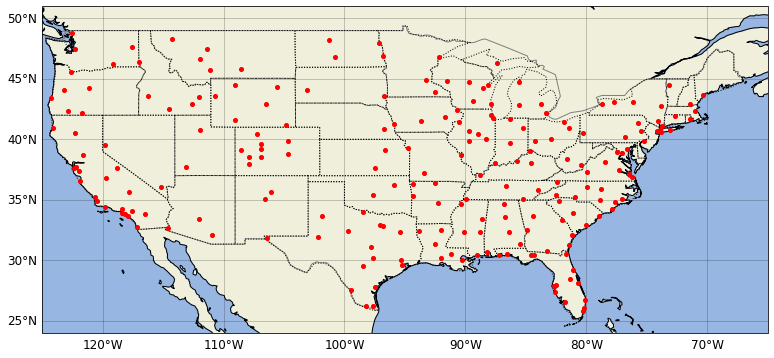

In [35]:
plt.figure(figsize=(13,6.2))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Set lat/lon limit of map
ax.set_extent([-125, -65, 24, 51], crs=cartopy.crs.PlateCarree())

# Add features
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', color='grey')
ax.add_geometries(cartopy.io.shapereader.Reader(cartopy.io.shapereader.natural_earth\
                                                (resolution='110m',category='cultural', 
                                                 name='admin_1_states_provinces_lakes_shp')).geometries(),
                  cartopy.crs.PlateCarree(),facecolor='none',edgecolor='black',ls=':')

# Add lat/lon grid
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle='-', color='k',alpha=0.2)
gl.xlocator = mticker.FixedLocator(np.arange(-120,-60,10))
gl.ylocator = mticker.FixedLocator(np.arange(25,55,5))
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style= {'size': 12, 'color': 'k'}
gl.ylabel_style= {'size': 12, 'color': 'k'}

# Add airport locations
ax.plot(df.long, df.lat, transform=cartopy.crs.PlateCarree(),marker='o', color='red', markersize=4, linestyle='')

plt.show()

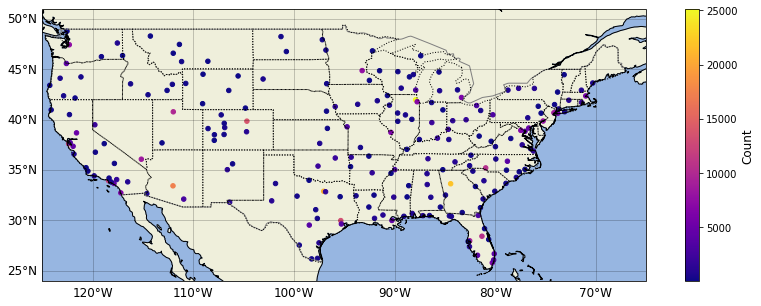

In [43]:
fig = plt.figure(figsize=(14,5))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Set lat/lon limit of map
ax.set_extent([-125, -65, 24, 51], crs=cartopy.crs.PlateCarree())

# Add features
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', color='grey')
ax.add_geometries(cartopy.io.shapereader.Reader(cartopy.io.shapereader.natural_earth\
                                                (resolution='110m',category='cultural', 
                                                 name='admin_1_states_provinces_lakes_shp')).geometries(),
                  cartopy.crs.PlateCarree(),facecolor='none',edgecolor='black',ls=':')

# Add lat/lon grid
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle='-', color='k',alpha=0.2)
gl.xlocator = mticker.FixedLocator(np.arange(-120,-60,10))
gl.ylocator = mticker.FixedLocator(np.arange(25,55,5))
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style= {'size': 12, 'color': 'k'}
gl.ylabel_style= {'size': 12, 'color': 'k'}

# Add airport locations with color showing number of arrivals
p = ax.scatter(df.long, df.lat, c=df.cnt, transform=cartopy.crs.PlateCarree(), s = 20, cmap = 'plasma')
cb = fig.colorbar(p)
cb.set_label(r'Count',fontsize=12)
plt.show()

## Gridded data

In [53]:
import xarray as xr

In [56]:
ds = xr.open_dataset("http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods",decode_times=False)

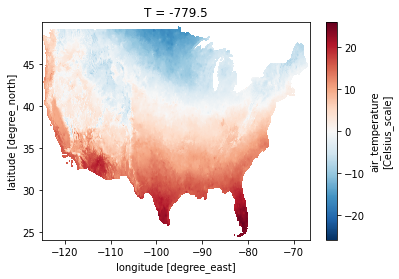

In [59]:
ds.tmax[0].plot()

In [71]:
dx = np.unique(np.round(np.diff(ds.X),4))[0]
dy = -np.unique(np.round(np.diff(ds.Y),4))[0]
print('Grid spacing\n',dx,dy)

Grid spacing
 0.0417 0.0417


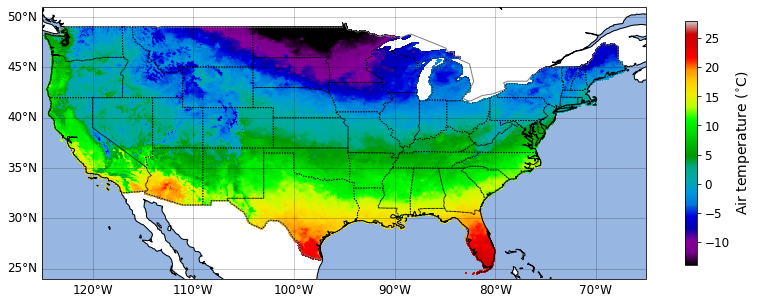

In [75]:
fig = plt.figure(figsize=(14,5))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Set lat/lon limit of map
ax.set_extent([-125, -65, 24, 51], crs=cartopy.crs.PlateCarree())

# Add features
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', color='grey')
ax.add_geometries(cartopy.io.shapereader.Reader(cartopy.io.shapereader.natural_earth\
                                                (resolution='110m',category='cultural', 
                                                 name='admin_1_states_provinces_lakes_shp')).geometries(),
                  cartopy.crs.PlateCarree(),facecolor='none',edgecolor='black',ls=':')

# Add lat/lon grid
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle='-', color='k',alpha=0.2)
gl.xlocator = mticker.FixedLocator(np.arange(-120,-60,10))
gl.ylocator = mticker.FixedLocator(np.arange(25,55,5))
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style= {'size': 12, 'color': 'k'}
gl.ylabel_style= {'size': 12, 'color': 'k'}

p = ax.pcolormesh(ds.X-dx/2, ds.Y-dy/2, np.ma.masked_invalid(ds.tmax[0]),
                  cmap='nipy_spectral', vmin=-14, vmax=28,transform=cartopy.crs.PlateCarree())

cb = fig.colorbar(p, orientation='vertical', shrink=0.9, ticks=np.arange(-10,30,5))
cb.ax.tick_params(labelsize=12)
cb.set_label(r'Air temperature ($^{\circ}$C)', fontsize=14)
plt.show()